<a href="https://colab.research.google.com/github/msohaildanish/cv-learn/blob/master/alexnet_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant modules

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2020-09-29 07:21:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   100MB/s    in 0.7s    

2020-09-29 07:21:40 (100 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# extract the compressed data into image files
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

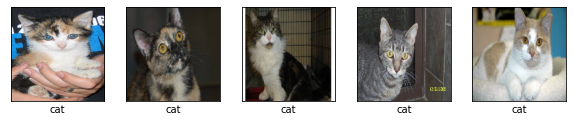

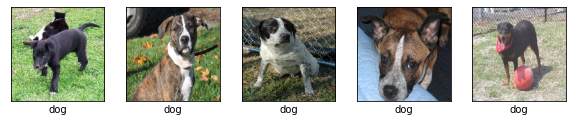

In [15]:
# Plot and validate the training data
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
# verify the images labels
plt.figure(figsize=(10,10))
for i in range(5):
  img_path = os.path.join(train_cats_dir, train_cat_fnames[i])
  img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
  # x = img_to_array(img)   
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  plt.xlabel('cat')
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
  img_path = os.path.join(train_dogs_dir, train_dog_fnames[i])
  img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
  # x = img_to_array(img)   
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  plt.xlabel('dog')

plt.show()

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(227,227),
                                                    batch_size=20, class_mode='binary')

val_generator = val_datagen.flow_from_directory(train_dir,target_size=(227,227),
                                                    batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [28]:
def create_model(my_learning_rate):
  """ Create and Compile AlexNet """
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(filters=96, kernel_size=(11,11),
                                strides=(4,4), activation='relu', input_shape=(227,227,3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
  model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),
                                padding='same', activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
  model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),
                                padding='same', activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1),
                                padding='same', activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1),
                                padding='same', activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(4096, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(4096, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # compile the model
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss='binary_crossentropy', metrics=['acc'])
  return model

In [26]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [29]:
learning_rate = 0.01
my_model = create_model(learning_rate)
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [30]:
history = my_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=val_generator,
      validation_steps=50,
      )
# list_of_metrics_to_plot = ['accuracy']
# plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/50
100/100 [==============================] - 31s 308ms/step - loss: 317.0362 - acc: 0.4920 - val_loss: 52.3799 - val_acc: 0.5090
Epoch 2/50
100/100 [==============================] - 31s 306ms/step - loss: 13.5080 - acc: 0.5030 - val_loss: 6.8046 - val_acc: 0.5220
Epoch 3/50
100/100 [==============================] - 30s 305ms/step - loss: 20.3111 - acc: 0.5005 - val_loss: 13.0475 - val_acc: 0.5330
Epoch 4/50
100/100 [==============================] - 30s 304ms/step - loss: 11.3195 - acc: 0.5190 - val_loss: 1.7723 - val_acc: 0.4880
Epoch 5/50
100/100 [==============================] - 31s 306ms/step - loss: 5.1197 - acc: 0.5085 - val_loss: 0.9990 - val_acc: 0.5040
Epoch 6/50
100/100 [==============================] - 31s 306ms/step - loss: 2.6484 - acc: 0.5085 - val_loss: 0.9854 - val_acc: 0.5270
Epoch 7/50
100/100 [==============================] - 31s 310ms/step - loss: 2.2735 - acc: 0.4985 - val_loss: 0.7030 - val_acc: 0.4830
Epoch 8/50
100/100 [============================

In [31]:
history.history

{'acc': [0.492000013589859,
  0.503000020980835,
  0.5005000233650208,
  0.5189999938011169,
  0.5084999799728394,
  0.5084999799728394,
  0.4984999895095825,
  0.5009999871253967,
  0.49799999594688416,
  0.49549999833106995,
  0.5044999718666077,
  0.48500001430511475,
  0.49900001287460327,
  0.5044999718666077,
  0.49950000643730164,
  0.4869999885559082,
  0.4959999918937683,
  0.4925000071525574,
  0.4909999966621399,
  0.4855000078678131,
  0.48249998688697815,
  0.5040000081062317,
  0.48399999737739563,
  0.5005000233650208,
  0.492000013589859,
  0.4894999861717224,
  0.484499990940094,
  0.5099999904632568,
  0.5009999871253967,
  0.5040000081062317,
  0.49000000953674316,
  0.4984999895095825,
  0.49399998784065247,
  0.5065000057220459,
  0.47999998927116394,
  0.4814999997615814,
  0.5005000233650208,
  0.5024999976158142,
  0.48899999260902405,
  0.48500001430511475,
  0.4909999966621399,
  0.49799999594688416,
  0.4970000088214874,
  0.5070000290870667,
  0.507499992847

Text(0.5, 1.0, 'Training and validation loss')

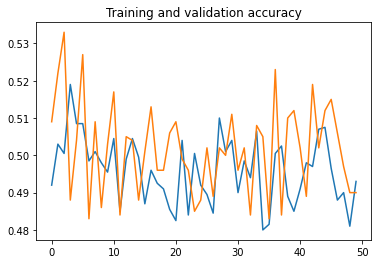

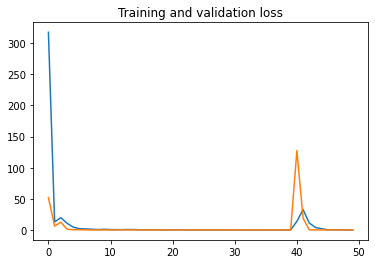

In [32]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')